In [1]:
import numpy as np
import matplotlib.pyplot as plt

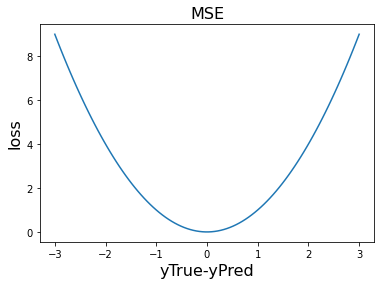

In [73]:
# l1 = (yTrue-yPred)^2
deltaY = np.linspace(-3,3,100)
loss = deltaY**2 
plt.plot(deltaY, loss)
plt.title("MSE", fontsize=16)
plt.xlabel("yTrue-yPred", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.show()

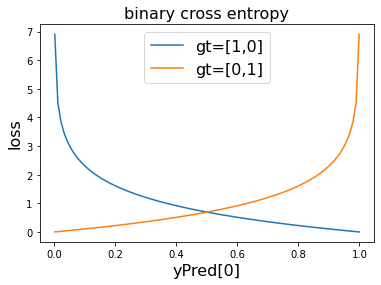

In [56]:
# l1 = -log(yPred[0]) if yTrue=[1,0] else -log(1-yPred[0])
eps=1e-3
predY = np.linspace(eps,1-eps,100)
lossGTC0 = -1*np.log(predY)
lossGTC1 = -1*np.log(1-predY)
plt.plot(predY,lossGTC0)
plt.plot(predY,lossGTC1)
plt.title("binary cross entropy", fontsize=16)
plt.xlabel("yPred[0]", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.legend(labels=["gt=[1,0]", "gt=[0,1]"], fontsize=16)
plt.show()

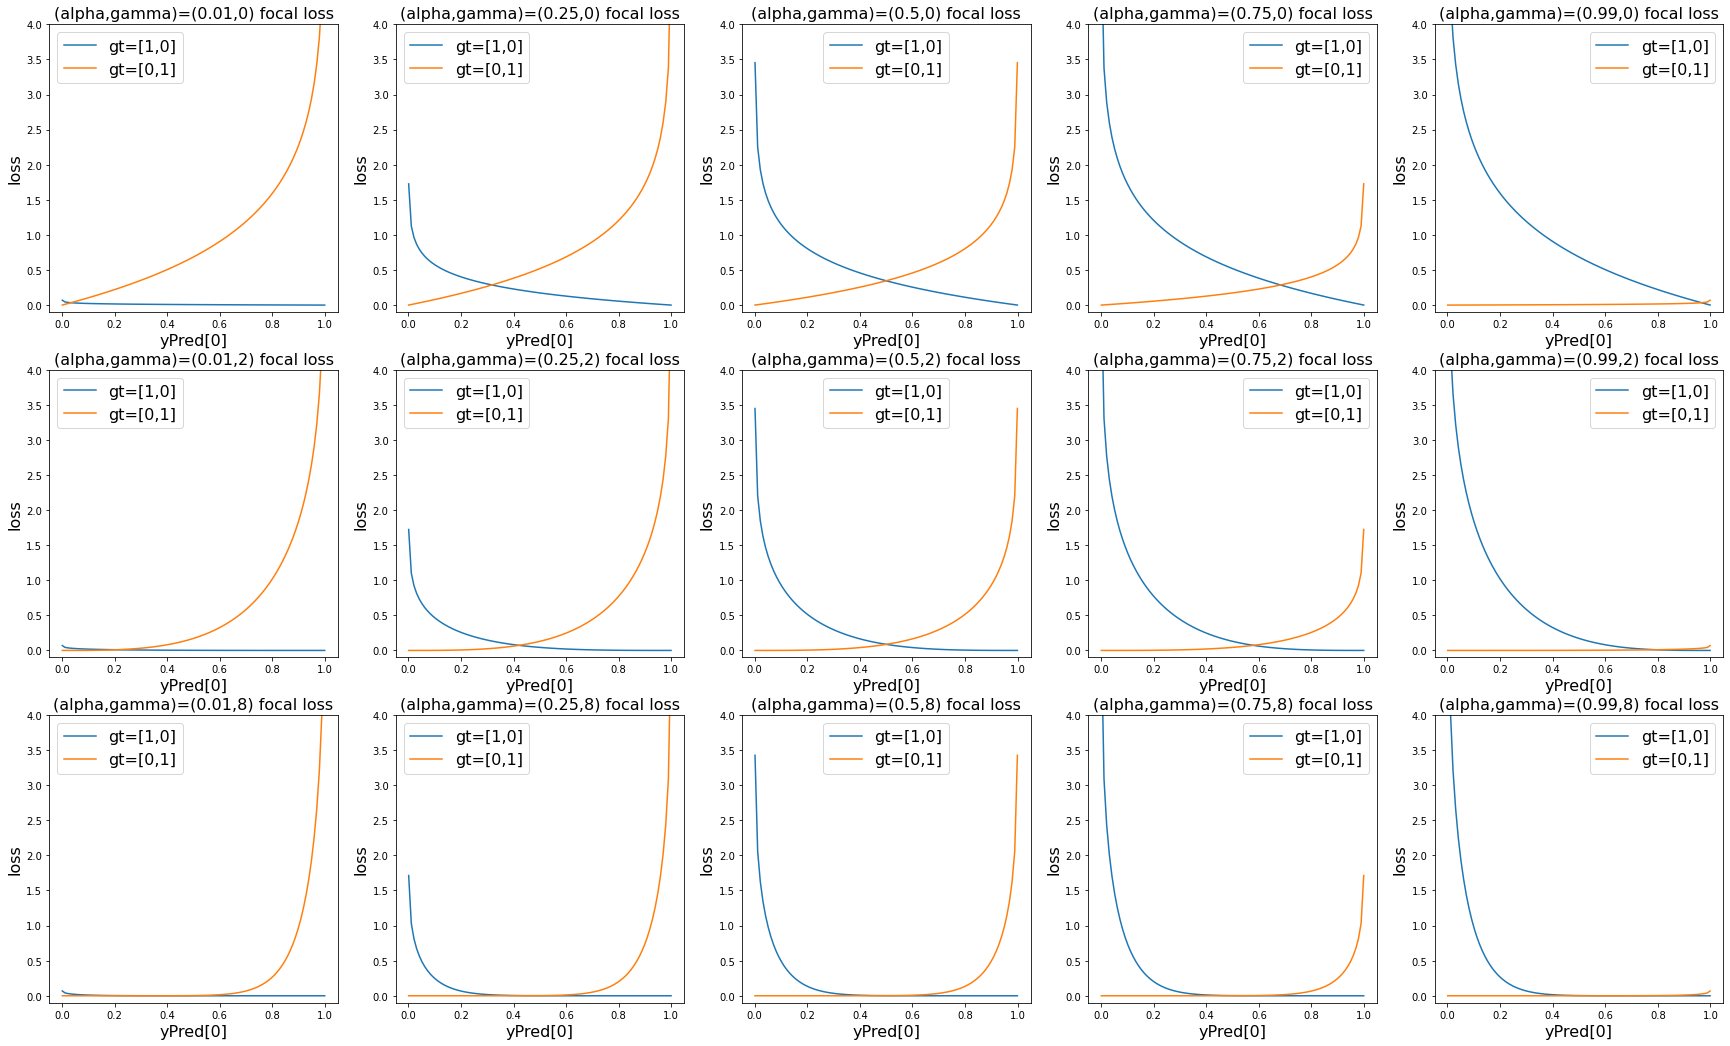

In [72]:
# FP:upper left, FN:upper right, TN:down left, TP:down right
# precision=TP/(FP+TP), recall=TP/(FN+TP)
# if value at precision: loss(FN)>loss(FP), i.e. 0<alpha<0.5
# loss near TN -> 0
# l1 = -alpha*(1-yPred[0])**gamma*log(yPred[0]) if yTrue=[1,0] else -(1-alpha)*yPred[0]**gamma*log(1-yPred[0])
gammas = [0,2,8]                   # curvature
alphas = [0.01,0.25,0.5,0.75,0.99] # balance P/N # precision/recall
plt.figure(figsize=(6*len(alphas),(4+2)*len(gammas)))
eps=1e-3
predY = np.linspace(eps,1-eps,100)
for i,gamma in enumerate(gammas):
    for j,alpha in enumerate(alphas):
        plt.subplot( len(gammas),len(alphas),1+i*len(alphas)+j )
        lossGTC0 = -alpha*(1-predY)**gamma*np.log(predY)
        lossGTC1 = -(1-alpha)*predY**gamma*np.log(1-predY)
        plt.plot(predY,lossGTC0)
        plt.plot(predY,lossGTC1)
        plt.title(f"(alpha,gamma)=({alpha},{gamma}) focal loss", fontsize=16)
        plt.xlabel("yPred[0]", fontsize=16)
        plt.ylabel("loss", fontsize=16)
        plt.legend(labels=["gt=[1,0]", "gt=[0,1]"], fontsize=16)
        plt.ylim(-0.1,4)
plt.show()